In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df =pd.read_csv('wall.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Time Series Analysis for Forecasting Trends and Seasonality

C:\Users\ramin\AppData\Local\Temp\ipykernel_4276\3197737506.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[ 'Date'] = pd.to_datetime(df[ 'Date'])


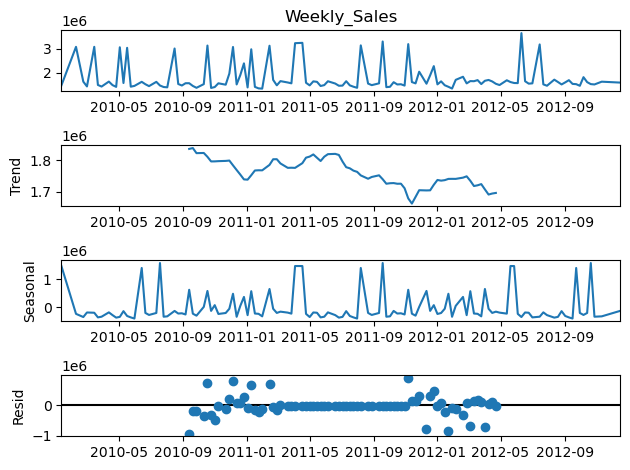

C:\Users\ramin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ramin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ramin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


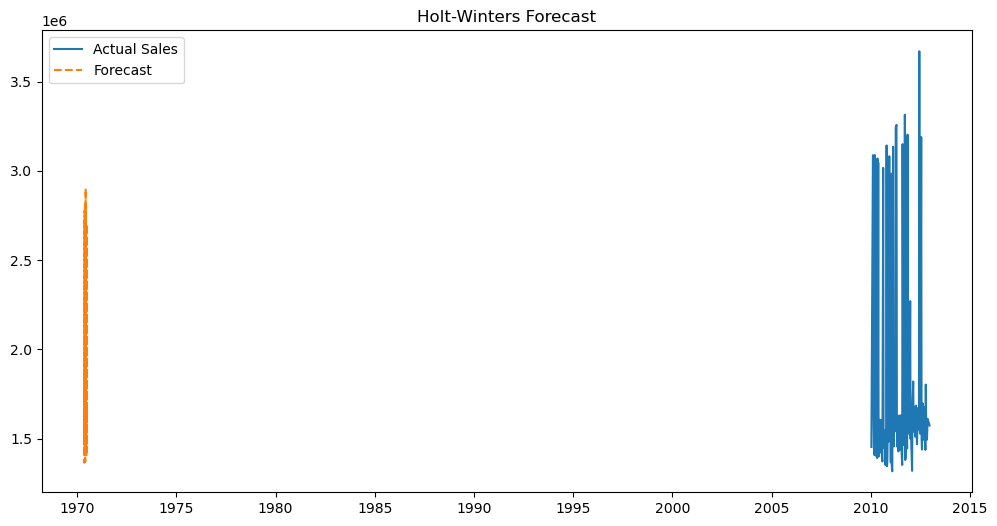

In [19]:
df[ 'Date'] = pd.to_datetime(df[ 'Date'])
df.set_index('Date', inplace=True)
df_weekly = df.groupby('Store').resample('W').sum()
# Time series decomposition
store_id = 1
store_data = df_weekly.loc[store_id]['Weekly_Sales']
store_data = store_data[store_data > 0]

# Time series decomposition with Additive model
decomposition = seasonal_decompose(store_data, model='additive', period=52)
fig = decomposition.plot()
plt.show()

# Holt-Winters Exponential Smoothing with Additive model
model = ExponentialSmoothing(store_data, seasonal='additive', seasonal_periods=52)
hw_fit = model.fit()
hw_forecast = hw_fit.forecast(steps=52)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(store_data, label='Actual Sales')
plt.plot(hw_forecast, label='Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.legend()
plt.show()



# 2 Clustering Techniques for Segmentation and Pattern Recognition

C:\Users\ramin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ramin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


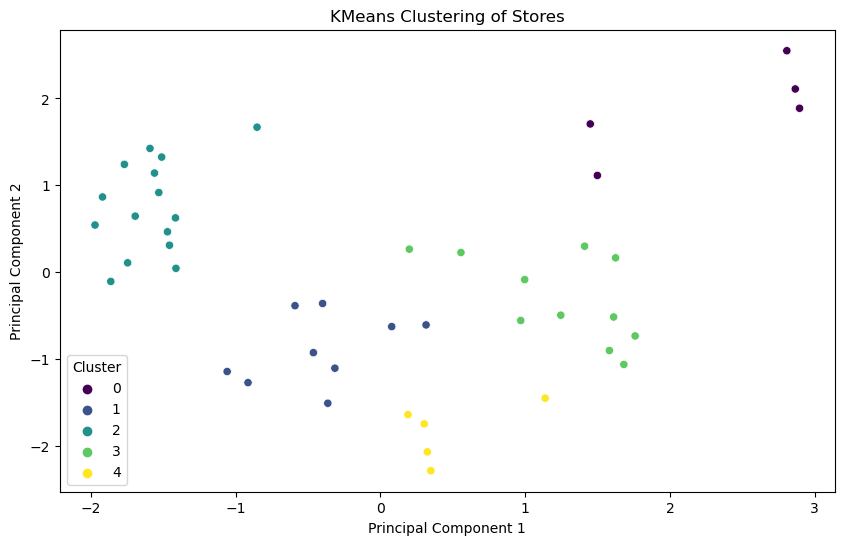

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df_features = df.groupby('Store')[features].mean()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# PCA 
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_features['Cluster'] = kmeans.fit_predict(df_pca)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_features['Cluster'], palette='viridis')
plt.title('KMeans Clustering of Stores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 3)Classification Techniques for Pattern Recognition

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1183
           1       1.00      1.00      1.00       104

    accuracy                           1.00      1287
   macro avg       1.00      1.00      1.00      1287
weighted avg       1.00      1.00      1.00      1287



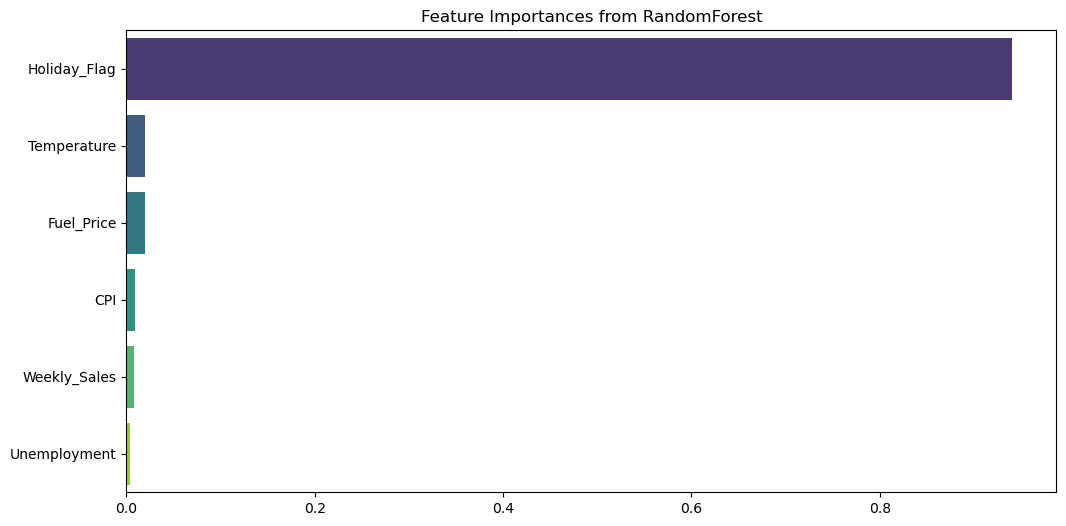

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = df[features]
y = df['Holiday_Flag']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#  RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# Predict and evaluate
y_pred = rf_classifier.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Feature Importance
importances = rf_classifier.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Feature Importances from RandomForest')
plt.show()
